<a href="https://colab.research.google.com/github/nericovich/project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект для задачи Яндекс Лицея "Анализ экологических проблем"

### На заводе по производству полезного полимера ООО “Synthesising the future“ обратились за помощью в исследовании зависимостей вредных выбросов от производственных показателей. Требуется повести анализ данных и построить выводы о том, какой этап имеет высокий риск создать повышенное содержания вредного газа.


## Импорты

In [729]:
import pandas as pd
import seaborn as sns
from scipy.stats import mannwhitneyu, ttest_ind, shapiro
import numpy as np

In [730]:
df = pd.read_csv('data.csv', sep=',', decimal='.', skipinitialspace=True)

## Main


### Обработка

In [731]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.shape)
df = df.dropna(subset=['stage_4_output_danger_gas'])
df = df.reset_index(drop=True)
df

(4400, 24)


,datetime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,stage_2_output_top_temp,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift
0,2021-01-28 21:00:00,67.93,90.24,473.59,75.26,97.79,49.33,356.74,249.87,97.50,...,108.63,45.87,156.41,19.36,5.97,339.99,0.16,21.48,46.01,2.0
1,2021-01-29 01:00:00,71.23,105.97,475.01,76.90,98.28,51.24,370.37,260.85,98.14,...,108.26,45.74,156.46,22.93,5.73,319.95,0.15,21.98,52.55,2.0
2,2021-01-29 08:00:00,68.83,106.60,471.56,76.74,NaN,49.14,359.06,248.59,NaN,...,109.49,46.10,156.18,17.95,5.73,258.98,0.13,22.58,42.99,1.0
3,2021-01-29 21:00:00,68.73,104.05,465.82,75.31,96.24,45.14,341.09,224.87,96.27,...,108.08,45.84,156.62,15.20,5.88,319.02,0.14,20.78,43.67,1.0
4,2021-01-30 01:00:00,66.03,103.28,468.38,77.53,96.48,52.44,373.44,267.24,96.80,...,109.20,45.99,156.51,18.52,5.71,297.12,0.15,21.28,47.43,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,2023-03-19 12:00:00,67.33,43.32,409.32,82.00,105.65,69.35,771.29,223.71,97.37,...,111.26,41.04,152.90,22.69,4.14,381.37,0.20,21.18,9.17,2.0
930,2023-03-20 00:00:00,68.83,62.24,377.84,79.82,104.80,61.08,781.76,183.36,97.70,...,110.09,46.40,152.53,21.38,4.15,381.77,0.14,21.08,10.79,2.0
931,2023-03-20 12:00:00,66.83,61.92,397.95,81.19,105.50,66.26,776.52,227.64,98.31,...,108.65,45.99,152.53,21.78,4.14,391.60,0.20,21.08,9.27,1.0
932,2023-03-21 01:00:00,70.03,62.80,378.37,79.16,110.50,63.16,845.66,223.15,103.01,...,108.18,47.70,151.80,22.44,3.66,460.04,0.18,22.38,10.11,1.0


In [732]:
df.shape

(934, 24)

In [733]:
df.dtypes

datetime                                 object
stage_1_output_konv_avd                 float64
stage_2_input_water_sum                 float64
stage_2_output_bottom_pressure          float64
stage_2_output_bottom_temp              float64
stage_2_output_bottom_temp_hum_steam    float64
stage_2_output_bottom_vacuum            float64
stage_2_output_top_pressure             float64
stage_2_output_top_pressure_at_end      float64
stage_2_output_top_temp                 float64
stage_2_output_top_vacuum               float64
stage_3_input_pressure                  float64
stage_3_input_soft_water                float64
stage_3_input_steam                     float64
stage_3_output_temp_hum_steam           float64
stage_3_output_temp_top                 float64
stage_4_input_overheated_steam          float64
stage_4_input_polymer                   float64
stage_4_input_steam                     float64
stage_4_input_water                     float64
stage_4_output_danger_gas               

#### Пропуски

In [734]:
df.isna().sum()

datetime                                 0
stage_1_output_konv_avd                 12
stage_2_input_water_sum                 15
stage_2_output_bottom_pressure          18
stage_2_output_bottom_temp               8
stage_2_output_bottom_temp_hum_steam     4
stage_2_output_bottom_vacuum            24
stage_2_output_top_pressure              4
stage_2_output_top_pressure_at_end       1
stage_2_output_top_temp                  9
stage_2_output_top_vacuum               10
stage_3_input_pressure                  17
stage_3_input_soft_water                10
stage_3_input_steam                      1
stage_3_output_temp_hum_steam            2
stage_3_output_temp_top                 14
stage_4_input_overheated_steam           2
stage_4_input_polymer                   10
stage_4_input_steam                     26
stage_4_input_water                     21
stage_4_output_danger_gas                0
stage_4_output_dry_residue_avg           0
stage_4_output_product                   0
work_shift 

Надо что-то сделать со всеми, кроме stage_4_output_danger_gas

In [735]:
df[df['work_shift'].isna()]

,datetime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,stage_2_output_top_temp,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift


Пропуски везде - можно удалить

In [736]:
print(df.shape)
df = df.dropna(subset=['work_shift'])
# мы не можем позволить себе потенциально удалять искомый фактор danger_gas, тогда
# df = df[(df['work_shift'].isna()) & (df['stage_4_output_danger_gas'].notna())]
# df = df.query('stage_4_output_danger_gas.notna() and work_shift.isna()')
print(df.shape)
# print(df['work_shift'].isna().sum())
df['work_shift'].value_counts()

(934, 24)
(934, 24)


work_shift
1.0    475
2.0    459
Name: count, dtype: int64

69.06004338394794
69.33


<Axes: xlabel='stage_1_output_konv_avd', ylabel='Count'>

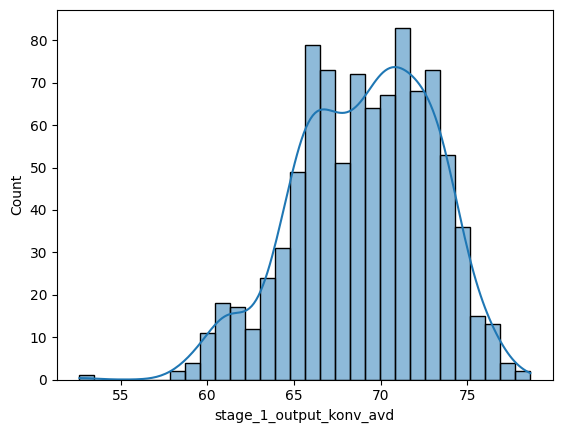

In [737]:
print(df['stage_1_output_konv_avd'].mean())
print(df['stage_1_output_konv_avd'].median())
sns.histplot(df['stage_1_output_konv_avd'], kde=True, bins=30)



In [738]:
df['stage_1_output_konv_avd'] = df['stage_1_output_konv_avd'].fillna(df['stage_1_output_konv_avd'].mean())


Проверили первый по графику и среднему/медиане, как будто бы можем среднее взть

87.33003264417846
83.85


<Axes: xlabel='stage_2_input_water_sum', ylabel='Count'>

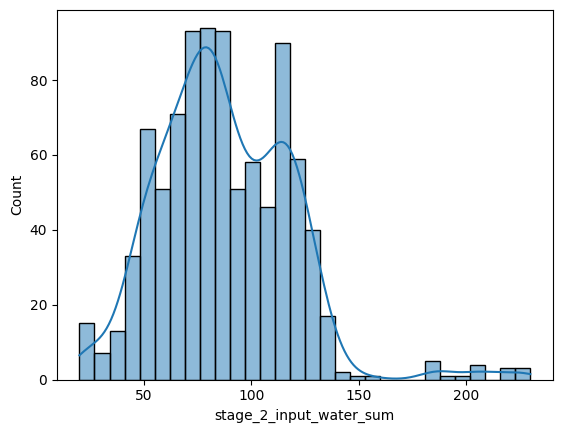

In [739]:
print(df['stage_2_input_water_sum'].mean())
print(df['stage_2_input_water_sum'].median())
sns.histplot(df['stage_2_input_water_sum'], kde=True, bins=30)

In [740]:
df['stage_2_input_water_sum'] = df['stage_2_input_water_sum'].fillna(df['stage_2_input_water_sum'].median()) #тут сомнения есть

395.1518995633188
376.485


<Axes: xlabel='stage_2_output_bottom_pressure', ylabel='Count'>

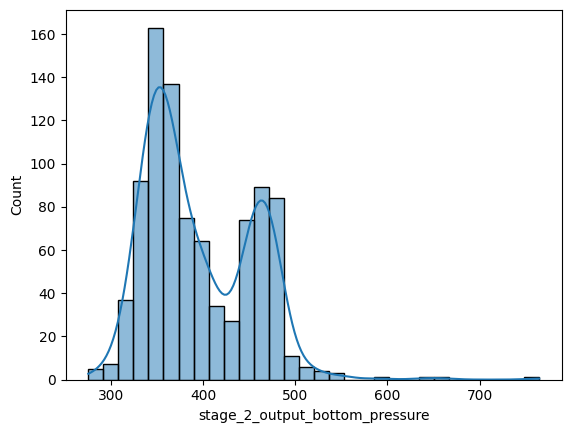

In [741]:
print(df['stage_2_output_bottom_pressure'].mean())
print(df['stage_2_output_bottom_pressure'].median())
sns.histplot(df['stage_2_output_bottom_pressure'], kde=True, bins=30)

здесь медиана

In [742]:
df['stage_2_output_bottom_pressure'] = df['stage_2_output_bottom_pressure'].fillna(df['stage_2_output_bottom_pressure'].median())

78.94448164146868
78.6


<Axes: xlabel='stage_2_output_bottom_temp', ylabel='Count'>

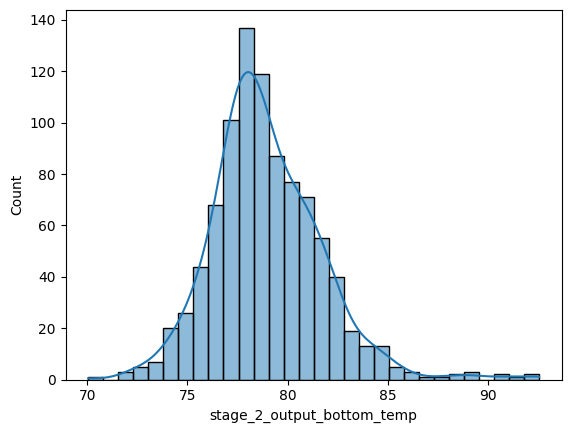

In [743]:
print(df['stage_2_output_bottom_temp'].mean())
print(df['stage_2_output_bottom_temp'].median())
sns.histplot(df['stage_2_output_bottom_temp'], kde=True, bins=30)

среднее прям хорошо должно быть

In [744]:
df['stage_2_output_bottom_temp'] = df['stage_2_output_bottom_temp'].fillna(df['stage_2_output_bottom_temp'].mean())


98.03411827956991
96.37


<Axes: xlabel='stage_2_output_bottom_temp_hum_steam', ylabel='Count'>

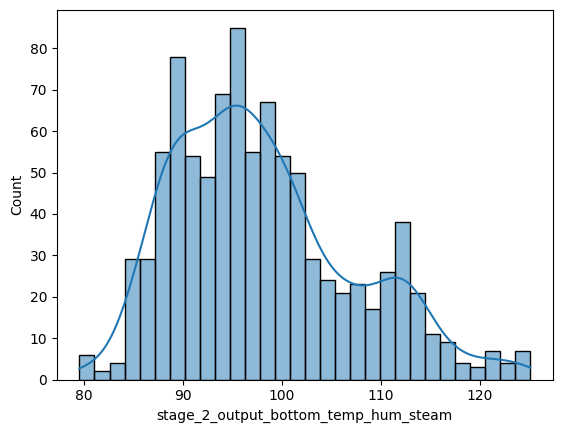

In [745]:
print(df['stage_2_output_bottom_temp_hum_steam'].mean())
print(df['stage_2_output_bottom_temp_hum_steam'].median())
sns.histplot(df['stage_2_output_bottom_temp_hum_steam'], kde=True, bins=30)

скошен неплохо прям, поэтому медиана как будто бы

In [746]:
df['stage_2_output_bottom_temp_hum_steam'] = df['stage_2_output_bottom_temp_hum_steam'].fillna(df['stage_2_output_bottom_temp_hum_steam'].median())

56.67148351648352
56.105000000000004


<Axes: xlabel='stage_2_output_bottom_vacuum', ylabel='Count'>

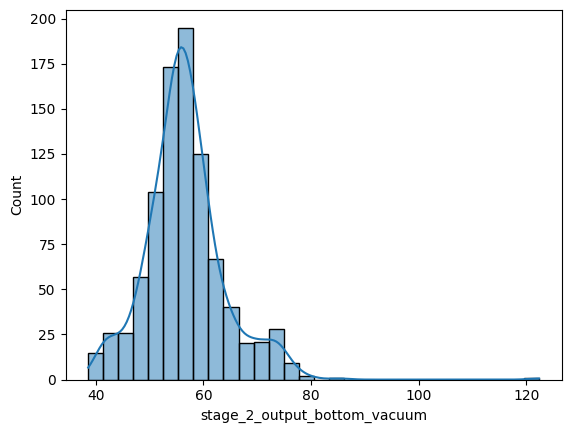

In [747]:
print(df['stage_2_output_bottom_vacuum'].mean())
print(df['stage_2_output_bottom_vacuum'].median())
sns.histplot(df['stage_2_output_bottom_vacuum'], kde=True, bins=30)

In [748]:
df['stage_2_output_bottom_vacuum'] = df['stage_2_output_bottom_vacuum'].fillna(df['stage_2_output_bottom_vacuum'].mean())

453.19545161290324
433.12


<Axes: xlabel='stage_2_output_top_pressure', ylabel='Count'>

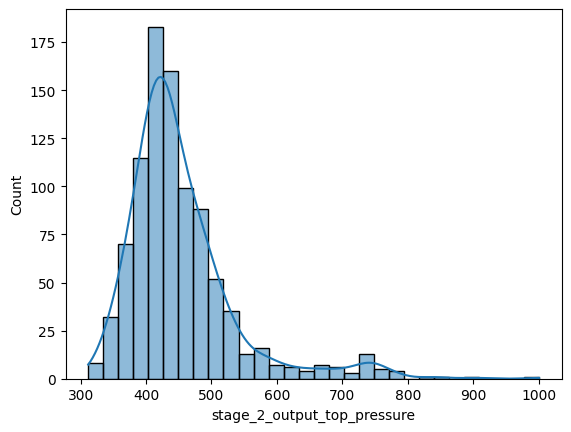

In [749]:
print(df['stage_2_output_top_pressure'].mean())
print(df['stage_2_output_top_pressure'].median())
sns.histplot(df['stage_2_output_top_pressure'], kde=True, bins=30)

как будто бы тоже медиана

In [750]:
df['stage_2_output_top_pressure'] = df['stage_2_output_top_pressure'].fillna(df['stage_2_output_top_pressure'].median())

262.83628081457664
261.2


<Axes: xlabel='stage_2_output_top_pressure_at_end', ylabel='Count'>

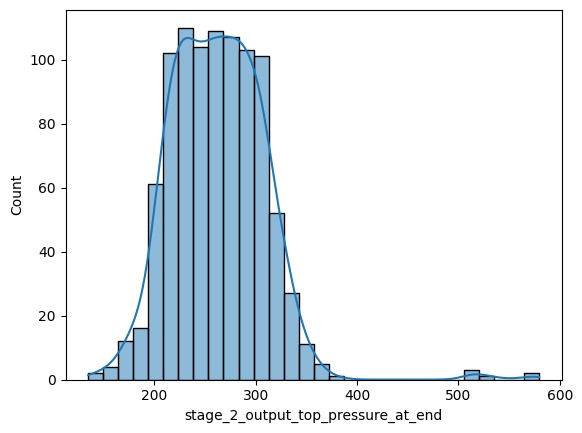

In [751]:
print(df['stage_2_output_top_pressure_at_end'].mean())
print(df['stage_2_output_top_pressure_at_end'].median())
sns.histplot(df['stage_2_output_top_pressure_at_end'], kde=True, bins=30)

In [752]:
df['stage_2_output_top_pressure_at_end'] = df['stage_2_output_top_pressure_at_end'].fillna(df['stage_2_output_top_pressure_at_end'].mean())

94.53408648648649
95.31


<Axes: xlabel='stage_2_output_top_temp', ylabel='Count'>

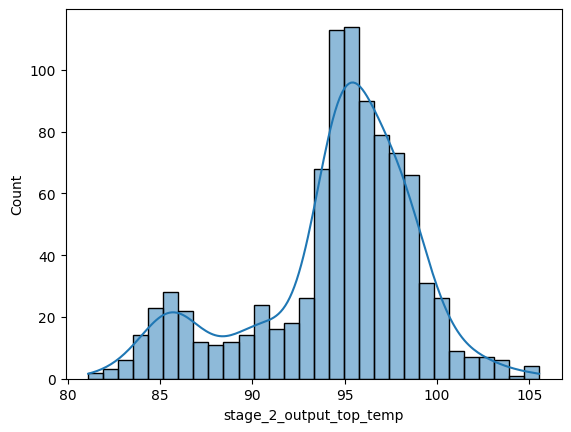

In [753]:
print(df['stage_2_output_top_temp'].mean())
print(df['stage_2_output_top_temp'].median())
sns.histplot(df['stage_2_output_top_temp'], kde=True, bins=30)

In [754]:
df['stage_2_output_top_temp'] = df['stage_2_output_top_temp'].fillna(df['stage_2_output_top_temp'].median())

58.5492316017316
56.239999999999995


<Axes: xlabel='stage_2_output_top_vacuum', ylabel='Count'>

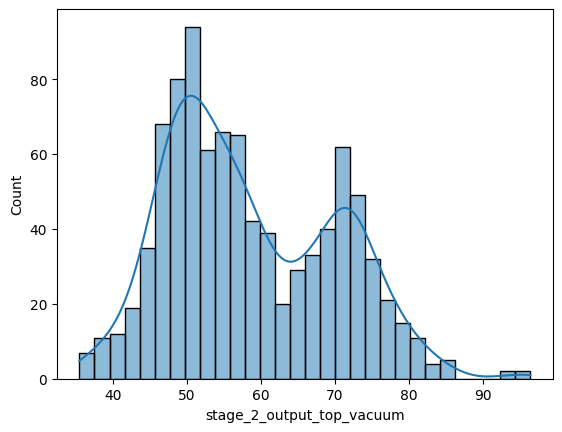

In [755]:
print(df['stage_2_output_top_vacuum'].mean())
print(df['stage_2_output_top_vacuum'].median())
sns.histplot(df['stage_2_output_top_vacuum'], kde=True, bins=30)


In [756]:
df['stage_2_output_top_vacuum'] = df['stage_2_output_top_vacuum'].fillna(df['stage_2_output_top_vacuum'].median())

0.33138495092693565
0.33


<Axes: xlabel='stage_3_input_pressure', ylabel='Count'>

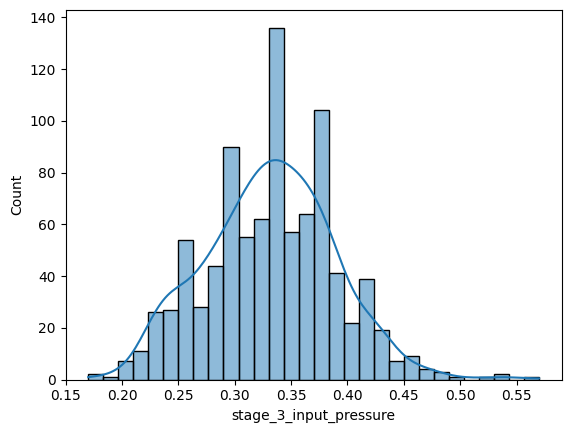

In [757]:
print(df['stage_3_input_pressure'].mean())
print(df['stage_3_input_pressure'].median())
sns.histplot(df['stage_3_input_pressure'], kde=True, bins=30)

чет вроде и выброс есть, но распределение то на нормальное похоже..

In [758]:
df['stage_3_input_pressure'] = df['stage_3_input_pressure'].fillna(df['stage_3_input_pressure'].median())

303.6336147186147
288.805


<Axes: xlabel='stage_3_input_soft_water', ylabel='Count'>

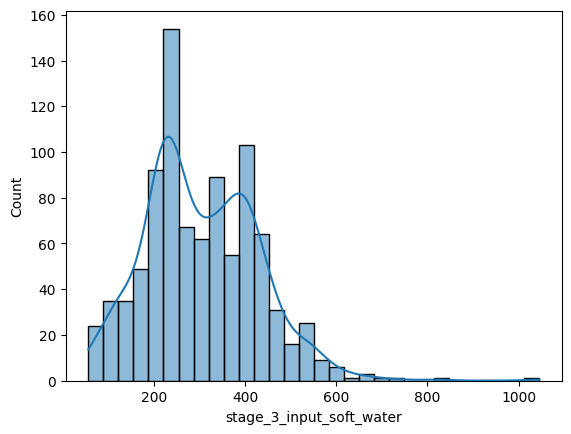

In [759]:
print(df['stage_3_input_soft_water'].mean())
print(df['stage_3_input_soft_water'].median())
sns.histplot(df['stage_3_input_soft_water'], kde=True, bins=30)

In [760]:
df['stage_3_input_soft_water'] = df['stage_3_input_soft_water'].fillna(df['stage_3_input_soft_water'].median())

823.0909110396569
775.1


<Axes: xlabel='stage_3_input_steam', ylabel='Count'>

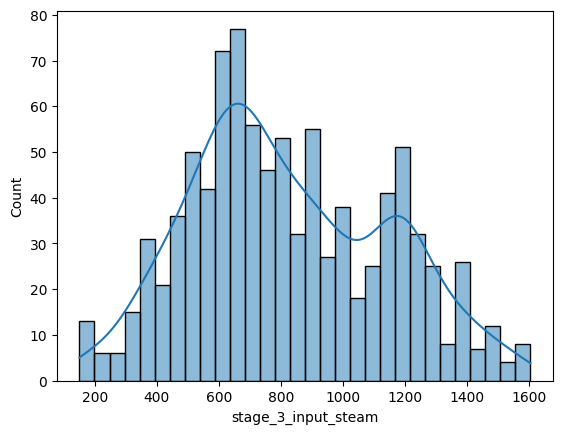

In [761]:
print(df['stage_3_input_steam'].mean())
print(df['stage_3_input_steam'].median())
sns.histplot(df['stage_3_input_steam'], kde=True, bins=30)

In [762]:
df['stage_3_input_steam'] = df['stage_3_input_steam'].fillna(df['stage_3_input_steam'].median())

42.27872826086956
43.935


<Axes: xlabel='stage_3_output_temp_top', ylabel='Count'>

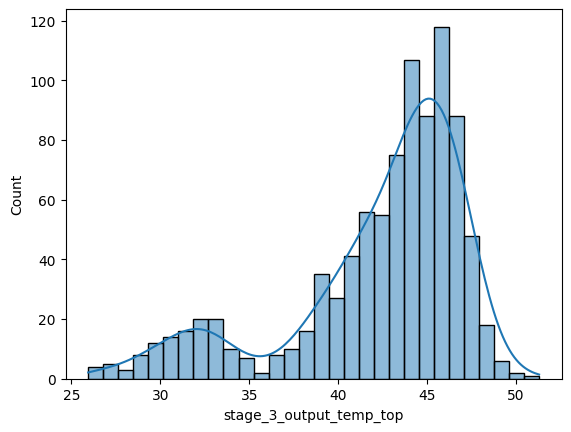

In [763]:
print(df['stage_3_output_temp_top'].mean())
print(df['stage_3_output_temp_top'].median())
sns.histplot(df['stage_3_output_temp_top'], kde=True, bins=30)

In [764]:
df['stage_3_output_temp_top'] = df['stage_3_output_temp_top'].fillna(df['stage_3_output_temp_top'].median())

109.5799678111588
109.095


<Axes: xlabel='stage_3_output_temp_hum_steam', ylabel='Count'>

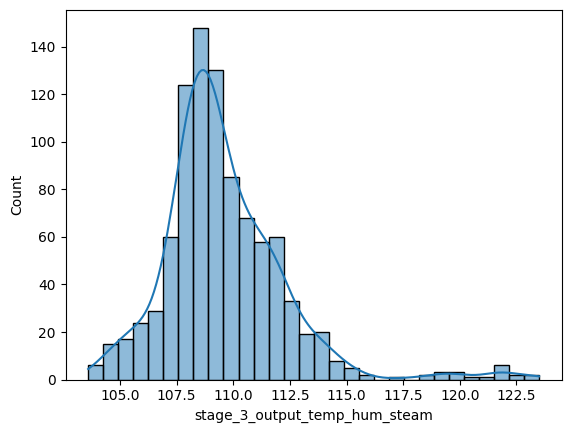

In [765]:
print(df['stage_3_output_temp_hum_steam'].mean())
print(df['stage_3_output_temp_hum_steam'].median())
sns.histplot(df['stage_3_output_temp_hum_steam'], kde=True, bins=30)

In [766]:
df['stage_3_output_temp_hum_steam'] = df['stage_3_output_temp_hum_steam'].fillna(df['stage_3_output_temp_hum_steam'].median())

153.30983905579401
153.165


<Axes: xlabel='stage_4_input_overheated_steam', ylabel='Count'>

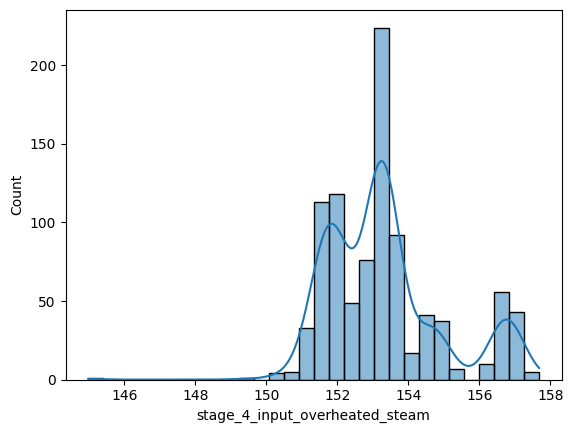

In [767]:
print(df['stage_4_input_overheated_steam'].mean())
print(df['stage_4_input_overheated_steam'].median())
sns.histplot(df['stage_4_input_overheated_steam'], kde=True, bins=30)

In [768]:
df['stage_4_input_overheated_steam'] = df['stage_4_input_overheated_steam'].fillna(df['stage_4_input_overheated_steam'].median())

20.090119047619044
20.475


<Axes: xlabel='stage_4_input_polymer', ylabel='Count'>

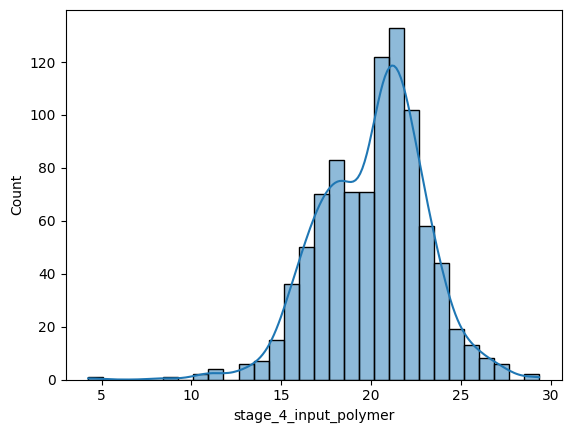

In [769]:
print(df['stage_4_input_polymer'].mean())
print(df['stage_4_input_polymer'].median())
sns.histplot(df['stage_4_input_polymer'], kde=True, bins=30)

In [770]:
df['stage_4_input_polymer'] = df['stage_4_input_polymer'].fillna(df['stage_4_input_polymer'].mean()) #как будто бы можно и среднее, хотя и вопрос

5.340594713656388
5.305


<Axes: xlabel='stage_4_input_steam', ylabel='Count'>

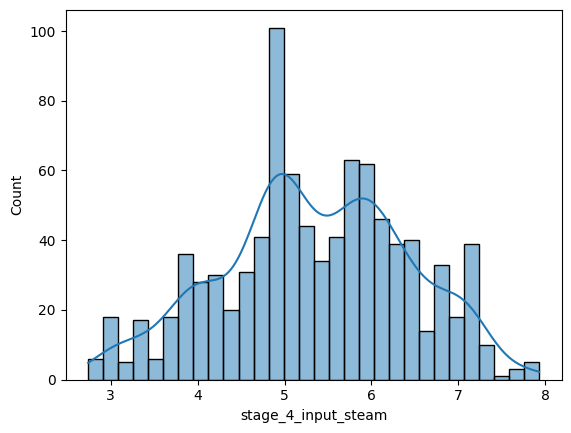

In [771]:
print(df['stage_4_input_steam'].mean())
print(df['stage_4_input_steam'].median())
sns.histplot(df['stage_4_input_steam'], kde=True, bins=30)

In [772]:
df['stage_4_input_steam'] = df['stage_4_input_steam'].fillna(df['stage_4_input_steam'].mean()) #тут также

302.10960569550934
285.56


<Axes: xlabel='stage_4_input_water', ylabel='Count'>

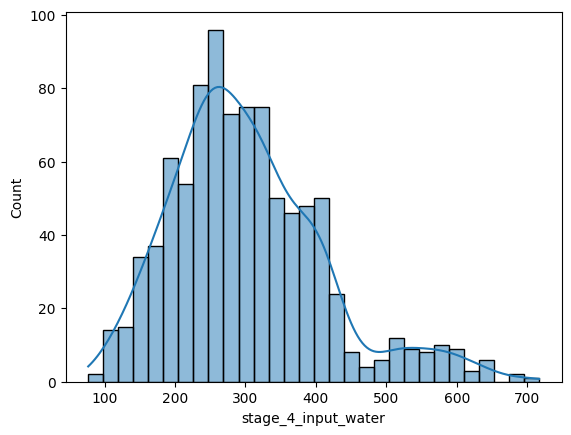

In [773]:
print(df['stage_4_input_water'].mean())
print(df['stage_4_input_water'].median())
sns.histplot(df['stage_4_input_water'], kde=True, bins=30)

In [774]:
df['stage_4_input_water'] = df['stage_4_input_water'].fillna(df['stage_4_input_water'].median()) #тут также

In [ ]:
df.isna().sum() 

datetime                                0
stage_1_output_konv_avd                 0
stage_2_input_water_sum                 0
stage_2_output_bottom_pressure          0
stage_2_output_bottom_temp              0
stage_2_output_bottom_temp_hum_steam    0
stage_2_output_bottom_vacuum            0
stage_2_output_top_pressure             0
stage_2_output_top_pressure_at_end      0
stage_2_output_top_temp                 0
stage_2_output_top_vacuum               0
stage_3_input_pressure                  0
stage_3_input_soft_water                0
stage_3_input_steam                     0
stage_3_output_temp_hum_steam           0
stage_3_output_temp_top                 0
stage_4_input_overheated_steam          0
stage_4_input_polymer                   0
stage_4_input_steam                     0
stage_4_input_water                     0
stage_4_output_danger_gas               0
stage_4_output_dry_residue_avg          0
stage_4_output_product                  0
work_shift                        

Проверим stage_4_output_product и stage_4_output_dry_residue_avg у них тоже было по 160 пропусков

In [776]:
print(df['stage_4_output_product'].isna().sum())
df['stage_4_output_dry_residue_avg'].isna().sum()

0


np.int64(0)

In [777]:
print(df['stage_4_input_water'].isna().sum())
df[df['stage_4_input_water'].isna()]

0


,datetime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,stage_2_output_top_temp,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift


Вероятно, ошибки или сбои, тк воду точно подавали

301.737505353319
285.56


<Axes: xlabel='stage_4_input_water', ylabel='Count'>

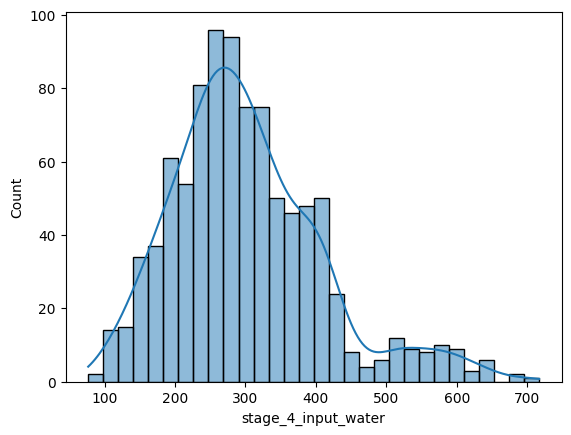

In [778]:
print(df['stage_4_input_water'].mean())
print(df['stage_4_input_water'].median())
sns.histplot(df['stage_4_input_water'], kde=True, bins=30)

Распределение назвать нормальным - трудно, но все же можно заполнить медианой

In [779]:
df['stage_4_input_water'] = df['stage_4_input_water'].fillna(df['stage_4_input_water'].median())
df['stage_4_input_water'].isna().sum()


np.int64(0)

stage_4_input_steam

In [780]:
df[df['stage_4_input_steam'].isna()]

,datetime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,stage_2_output_top_temp,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift


5.340594713656388
5.340297356828193


<Axes: xlabel='stage_4_input_steam', ylabel='Count'>

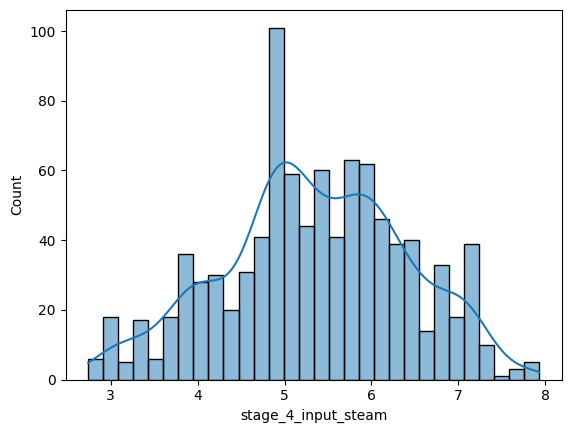

In [781]:
print(df['stage_4_input_steam'].mean())
print(df['stage_4_input_steam'].median())
sns.histplot(df['stage_4_input_steam'], kde=True, bins=30)

In [782]:
df[['stage_4_input_steam', 'stage_4_output_danger_gas']].corr(method='spearman')


,stage_4_input_steam,stage_4_output_danger_gas
stage_4_input_steam,1.000000,0.210373
stage_4_output_danger_gas,0.210373,1.000000


<Axes: xlabel='stage_4_input_steam', ylabel='stage_4_output_danger_gas'>

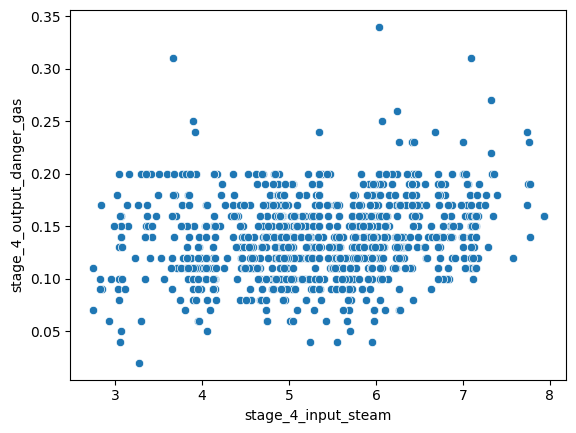

In [783]:
sns.scatterplot(x='stage_4_input_steam', y='stage_4_output_danger_gas', data=df)


Заполню медианой пожалуй)))

Распределение признака является бимодальным, что может указывать на наличие двух различных подгрупп в данных. Несмотря на это, ранговая корреляция Спирмена между признаками составляет 0.22, что говорит о слабой положительной зависимости.


In [784]:
df['stage_4_input_steam'] = df['stage_4_input_steam'].fillna(df['stage_4_input_steam'].median())
df['stage_4_input_steam'].isna().sum()

np.int64(0)

stage_4_input_polymer

In [785]:
df[df['stage_4_input_polymer'].isna()]

,datetime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,stage_2_output_top_temp,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift


20.090119047619048
20.445


<Axes: xlabel='stage_4_input_polymer', ylabel='Count'>

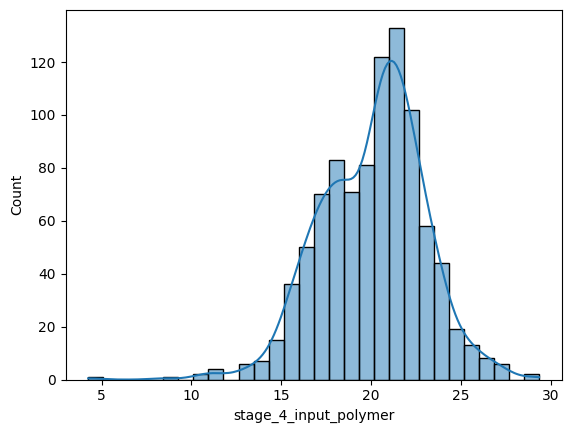

In [786]:
print(df['stage_4_input_polymer'].mean())
print(df['stage_4_input_polymer'].median())
sns.histplot(df['stage_4_input_polymer'], kde=True, bins=30)

Похоже на нормальное, можно средним

In [787]:
df['stage_4_input_polymer'] = df['stage_4_input_polymer'].fillna(df['stage_4_input_polymer'].mean())
df['stage_4_input_polymer'].isna().sum()

np.int64(0)

stage_4_input_overheated_steam подача перегретого пара, в м3

In [788]:
df[df['stage_4_input_overheated_steam'].isna()]

,datetime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,stage_2_output_top_temp,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift


153.30952890792292
153.165


<Axes: xlabel='stage_4_input_overheated_steam', ylabel='Count'>

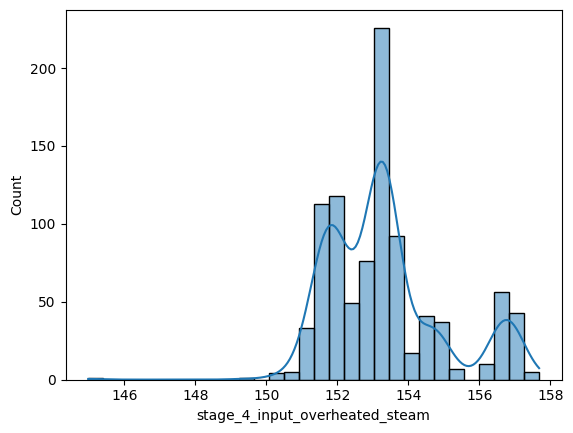

In [789]:
print(df['stage_4_input_overheated_steam'].mean())
print(df['stage_4_input_overheated_steam'].median())
sns.histplot(df['stage_4_input_overheated_steam'], kde=True, bins=30)

Есть какая- то анамалия, но в целом норм....

In [790]:
df['stage_4_input_overheated_steam'] = df['stage_4_input_overheated_steam'].fillna(df['stage_4_input_overheated_steam'].mean())
df['stage_4_input_overheated_steam'].isna().sum()

np.int64(0)

### Распределние

<Axes: xlabel='stage_1_output_konv_avd', ylabel='Density'>

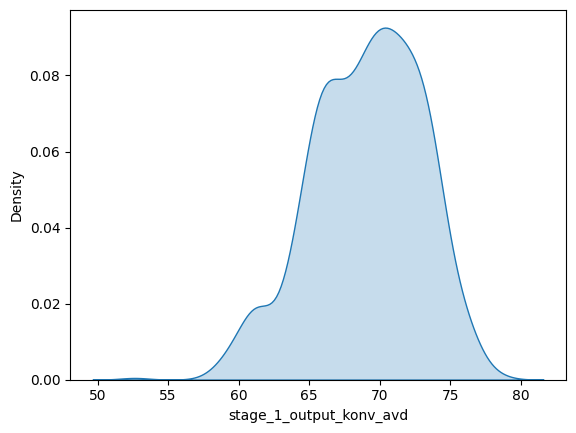

In [791]:
sns.kdeplot(data=df, x='stage_1_output_konv_avd', fill=True)

<Axes: xlabel='stage_2_input_water_sum', ylabel='Density'>

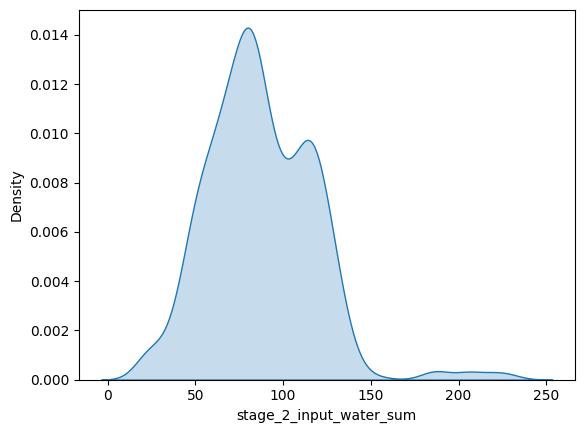

In [792]:
sns.kdeplot(data=df, x='stage_2_input_water_sum', fill=True)

<Axes: xlabel='stage_2_output_bottom_pressure', ylabel='Density'>

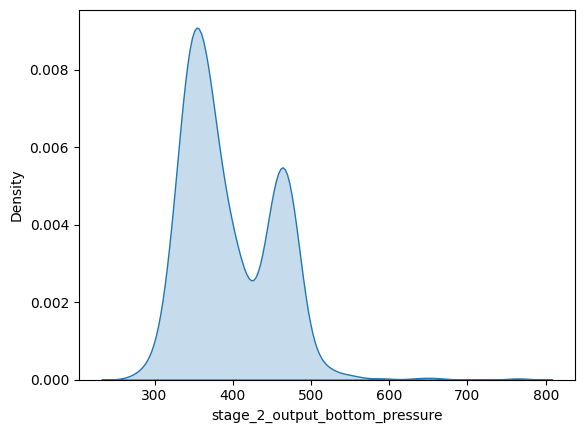

In [793]:
sns.kdeplot(data=df, x='stage_2_output_bottom_pressure', fill=True)

<Axes: xlabel='stage_2_output_bottom_temp', ylabel='Density'>

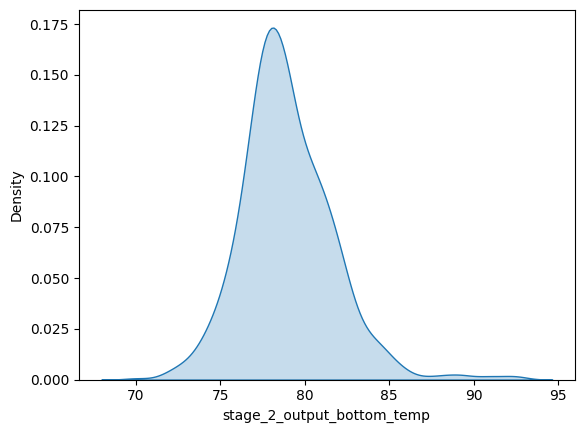

In [794]:
sns.kdeplot(data=df, x='stage_2_output_bottom_temp', fill=True)

<Axes: xlabel='stage_2_output_top_pressure', ylabel='Density'>

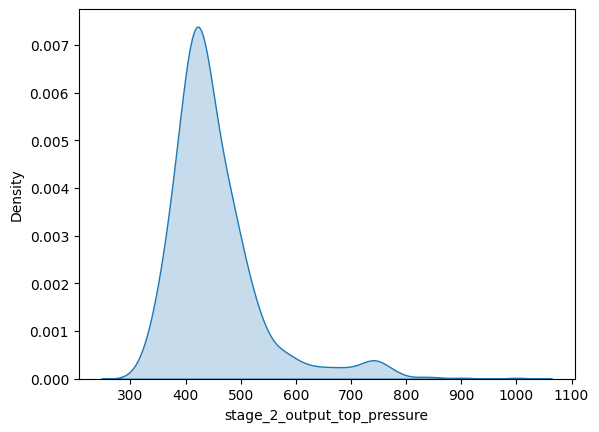

In [795]:
sns.kdeplot(data=df, x='stage_2_output_top_pressure', fill=True)

<Axes: xlabel='stage_2_output_top_pressure_at_end', ylabel='Density'>

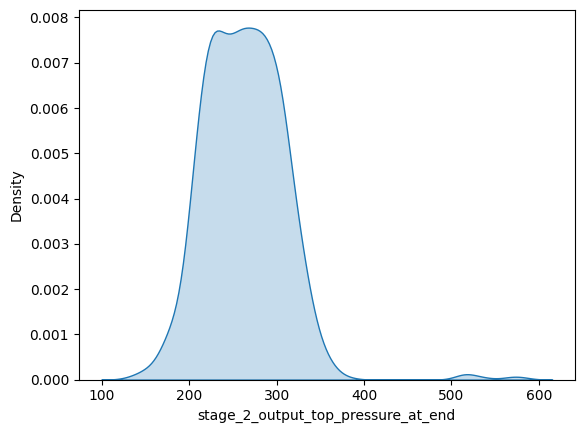

In [796]:
sns.kdeplot(data=df, x='stage_2_output_top_pressure_at_end', fill=True)

<Axes: xlabel='stage_3_input_pressure', ylabel='Density'>

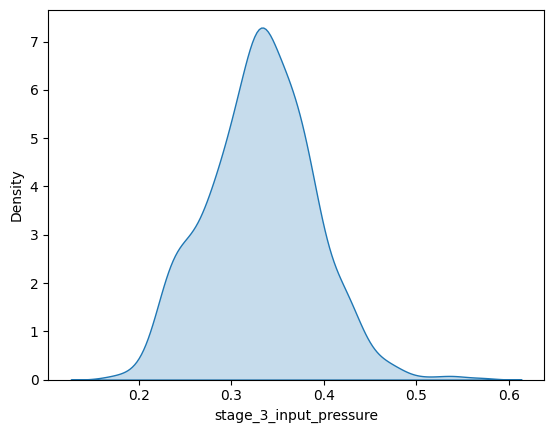

In [797]:
sns.kdeplot(data=df, x='stage_3_input_pressure', fill=True)

<Axes: xlabel='stage_3_output_temp_hum_steam', ylabel='Density'>

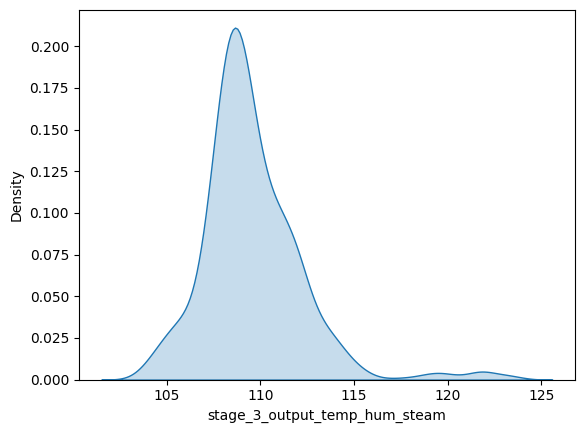

In [798]:
sns.kdeplot(data=df, x='stage_3_output_temp_hum_steam', fill=True)

<Axes: xlabel='stage_3_output_temp_top', ylabel='Density'>

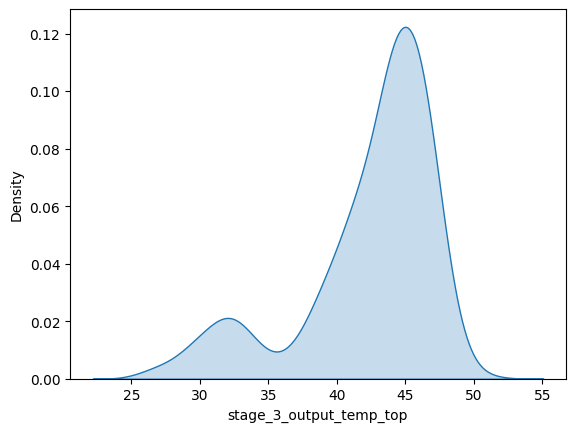

In [799]:
sns.kdeplot(data=df, x='stage_3_output_temp_top', fill=True)

<Axes: xlabel='stage_4_input_overheated_steam', ylabel='Density'>

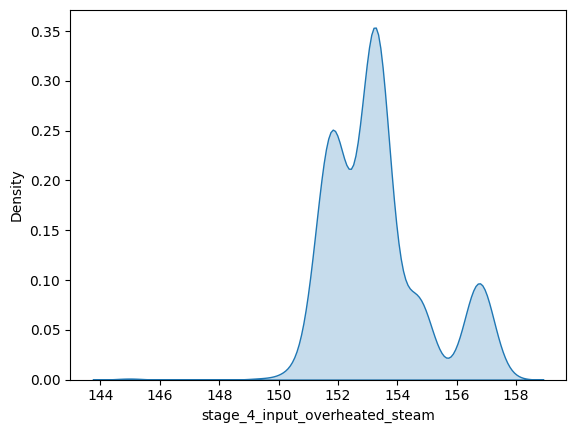

In [800]:
sns.kdeplot(data=df, x='stage_4_input_overheated_steam', fill=True)

<Axes: xlabel='stage_4_output_danger_gas', ylabel='Density'>

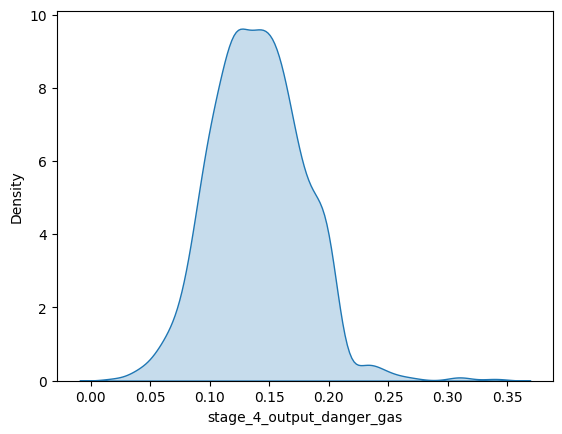

In [801]:
sns.kdeplot(data=df, x='stage_4_output_danger_gas', fill=True)

In [802]:
outlier_mask = False
nan_mask = df['stage_4_output_danger_gas'].isna()
print(nan_mask)
for col in df.select_dtypes(include=np.number).columns:
    if col == 'stage_4_output_danger_gas':
        continue
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_mask = outlier_mask | ((df[col] < lower_bound) | (df[col] > upper_bound))

# 3. Комбинируем условия
final_mask = nan_mask & outlier_mask
# 4. Количество таких строк:
count = final_mask.sum()
print("Количество строк:", count)
#если нет

0      False
1      False
2      False
3      False
4      False
       ...  
929    False
930    False
931    False
932    False
933    False
Name: stage_4_output_danger_gas, Length: 934, dtype: bool
Количество строк: 0


In [803]:
outlier_mask = False
nan_mask = df['stage_4_output_danger_gas'].notna()
for col in df.select_dtypes(include=np.number).columns:
    if col == 'stage_4_output_danger_gas':
        continue
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_mask = outlier_mask | ((df[col] < lower_bound) | (df[col] > upper_bound))

# 3. Комбинируем условия
final_mask = nan_mask & outlier_mask

# 4. Количество таких строк:
count = final_mask.sum()
print("Количество строк:", count)
#если есть

Количество строк: 514


In [804]:

#Этой штукой я искал выбрался. Да не очень правильно, но ладно
print(df.shape)
for i in df.columns[1:]:
    curr_df = df[i].describe()
    H = curr_df.iloc[6] - curr_df.iloc[4]
    no_upper_light = curr_df.iloc[4] + H * 3
    no_lower_light = curr_df.iloc[6] - H * 3

    no_upper_hard = curr_df.iloc[4] + H * 6
    no_lower_hard = curr_df.iloc[6] - H * 6
    len_i = len(i)
    res_1 = df[((df[i] >= no_upper_hard) | (df[i] <= no_lower_hard)) & (df['stage_4_output_danger_gas'].isna())][i]
    if len(res_1) != 0:
        print(f'{i}{(40 - len_i) * " "}{len(res_1)} СУПЕР ВЫБРОС')
    
    res_2 = df[(df[i] >= no_upper_light) | (df[i] <= no_lower_light) & (df['stage_4_output_danger_gas'].isna())][i]
    if len(res_2) != 0: 
        print(f'{i}{(40 - len_i) * " "}{len(res_2)} СЛАБЫЙ ВЫБРОС')
    print(' ')
    #без газа с выбросами - те данные которые мы в праве дропнуть(в теории) 
    #после того, как определим кол во строк с выбросами БЕЗ danger gas. Попробуем удалим
    #Пересмотреть варианты заполнения при ненормальном распределении...
    #Обучим несколько регрессионок. Условно: с выбросами, без выбросами...

(934, 24)
 
stage_2_input_water_sum                 11 СЛАБЫЙ ВЫБРОС
 
stage_2_output_bottom_pressure          2 СЛАБЫЙ ВЫБРОС
 
stage_2_output_bottom_temp              11 СЛАБЫЙ ВЫБРОС
 
 
stage_2_output_bottom_vacuum            26 СЛАБЫЙ ВЫБРОС
 
stage_2_output_top_pressure             46 СЛАБЫЙ ВЫБРОС
 
stage_2_output_top_pressure_at_end      6 СЛАБЫЙ ВЫБРОС
 
stage_2_output_top_temp                 3 СЛАБЫЙ ВЫБРОС
 
 
stage_3_input_pressure                  3 СЛАБЫЙ ВЫБРОС
 
stage_3_input_soft_water                3 СЛАБЫЙ ВЫБРОС
 
 
stage_3_output_temp_hum_steam           21 СЛАБЫЙ ВЫБРОС
 
 
stage_4_input_overheated_steam          12 СЛАБЫЙ ВЫБРОС
 
 
 
stage_4_input_water                     12 СЛАБЫЙ ВЫБРОС
 
stage_4_output_danger_gas               3 СЛАБЫЙ ВЫБРОС
 
 
 
 


In [805]:
#Тыкаюсь с выбросами

#Этой штукой я искал выбрался. Да не очень правильно, но ладно
print(df.shape)
for i in df.columns[1:]:
    curr_df = df[i].describe()
    H = curr_df.iloc[6] - curr_df.iloc[4]
    no_upper_light = curr_df.iloc[4] + H * 3
    no_lower_light = curr_df.iloc[6] - H * 3

    no_upper_hard = curr_df.iloc[4] + H * 6
    no_lower_hard = curr_df.iloc[6] - H * 6

    len_i = len(i)
    res_1 = df[((df[i] >= no_upper_hard) | (df[i] <= no_lower_hard)) & (df['stage_4_output_danger_gas'].isna())][i]
    if len(res_1) != 0:
        print(f'{i}{(40 - len_i) * " "}{len(res_1)} СУПЕР ВЫБРОС')
        df = df[(df[i] < no_upper_hard) & (df[i] > no_lower_hard)]
    
    res_2 = df[(df[i] >= no_upper_light) | (df[i] <= no_lower_light) & (df['stage_4_output_danger_gas'].isna())][i]
    if len(res_2) != 0: 
        print(f'{i}{(40 - len_i) * " "}{len(res_2)} СЛАБЫЙ ВЫБРОС')
        df = df[(df[i] < no_upper_hard) & (df[i] > no_lower_light)]
    print(' ')
#Думаю что в выбрасывать по нижней границе грустно, неправильно и печально


fqw = ['stage_2_input_water_sum', 'stage_2_output_bottom_pressure', 'stage_2_output_bottom_temp', 'stage_2_output_bottom_temp_hum_steam', 'stage_2_output_bottom_vacuum', 'stage_2_output_top_pressure', 'stage_2_output_top_pressure_at_end', 'stage_2_output_top_temp', 'stage_3_input_pressure', 'stage_3_input_soft_water', 'stage_3_output_temp_hum_steam', 'stage_4_input_overheated_steam', 'stage_4_input_water', 'stage_4_output_danger_gas']

#Таааакс что мы тут видим.
#Те у которых нет выбросов:
# *stage_1_output_konv_avd
# *stage_2_output_top_vacuum
# *stage_3_input_steam
# *stage_3_output_temp_top
# *stage_4_input_polymer
# *stage_4_input_steam
# *stage_4_output_dry_residue_avg
# *stage_4_output_product
# *work_shift



fqq = ['stage_2_input_water_sum', 'stage_2_output_bottom_pressure', 'stage_2_output_bottom_temp', 'stage_2_output_bottom_temp_hum_steam', 'stage_2_output_bottom_vacuum', 'stage_2_output_top_pressure', 'stage_2_output_top_pressure_at_end', 'stage_2_output_top_temp', 'stage_3_input_pressure', 'stage_3_input_soft_water', 'stage_3_output_temp_hum_steam', 'stage_4_input_overheated_steam', 'stage_4_input_water', 'stage_4_output_danger_gas']

#Всего 4240 данных, тогда стоит подумать много ли подобных данны чтобы их удалить? заменить? что стоит вообще сделать?
#Проверю данных на нормальность 

#Те у кого есть выбросы (выброс кол-во выбросов):
# *stage_2_input_water_sum              63   
# *stage_2_output_bottom_pressure       10  
# *stage_2_output_bottom_temp           70  
# *stage_2_output_bottom_temp_hum_steam 1   
# *stage_2_output_bottom_vacuum         76  
# *stage_2_output_top_pressure          121 
# *stage_2_output_top_pressure_at_end   16  
# *stage_2_output_top_temp              6   
# *stage_3_input_pressure               10  
# *stage_3_input_soft_water             15  
# *stage_3_output_temp_hum_steam        108 
# *stage_4_input_overheated_steam       6   
# *stage_4_input_water                  46  
# *stage_4_output_danger_gas            4   


koalit = []
for i in df.columns[1:]:
    _, res = shapiro(df[i])
    if res >= 0.05:
        koalit.append([i, 'нормальное'])
    else:
        koalit.append([i, 'ненормальное'])
print(koalit)
#Все ненормальные...ну из графиков конечно было очевидно, тогда думаю логично было бы выбросы ЕСЛИ И ЗАМЕНЯТЬ, то делать это медианой....
#Нужно будет подумать

#Я щас не искал верхние и нижние границы. НЕ ЗАБЫТЬ!!!!!!!!!!!

(934, 24)
 
stage_2_input_water_sum                 11 СЛАБЫЙ ВЫБРОС
 
stage_2_output_bottom_pressure          2 СЛАБЫЙ ВЫБРОС
 
stage_2_output_bottom_temp              11 СЛАБЫЙ ВЫБРОС
 
 
stage_2_output_bottom_vacuum            26 СЛАБЫЙ ВЫБРОС
 
stage_2_output_top_pressure             45 СЛАБЫЙ ВЫБРОС
 
stage_2_output_top_pressure_at_end      6 СЛАБЫЙ ВЫБРОС
 
stage_2_output_top_temp                 3 СЛАБЫЙ ВЫБРОС
 
 
stage_3_input_pressure                  4 СЛАБЫЙ ВЫБРОС
 
stage_3_input_soft_water                2 СЛАБЫЙ ВЫБРОС
 
 
stage_3_output_temp_hum_steam           21 СЛАБЫЙ ВЫБРОС
 
 
stage_4_input_overheated_steam          2 СЛАБЫЙ ВЫБРОС
 
 
 
stage_4_input_water                     9 СЛАБЫЙ ВЫБРОС
 
stage_4_output_danger_gas               3 СЛАБЫЙ ВЫБРОС
 
 
 
 
[['stage_1_output_konv_avd', 'ненормальное'], ['stage_2_input_water_sum', 'ненормальное'], ['stage_2_output_bottom_pressure', 'ненормальное'], ['stage_2_output_bottom_temp', 'ненормальное'], ['stage_2_output_bot

<Axes: >

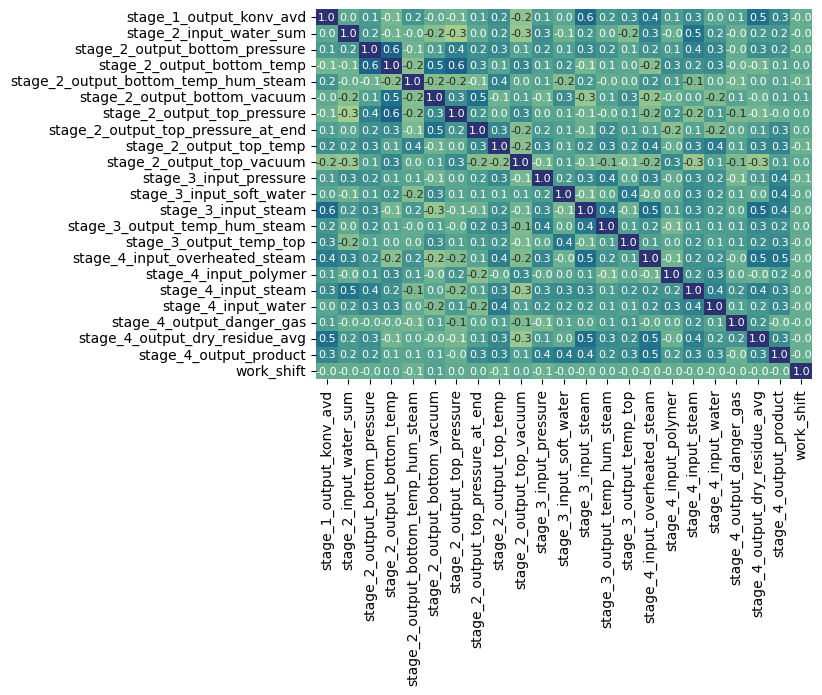

In [806]:
spec_df = df.drop('datetime', axis=1)

correlation_matrix = spec_df.corr(method='spearman')
# по приколу хочу глянуть матрицу корреляций...можно за одно heatmap составить
sns.heatmap(correlation_matrix, cmap="crest", fmt='.1f', cbar=False, annot=True, annot_kws={"size": 8})

# стоит ли добавлять work_shift в матрицу корреляций???

#stage_2_output_bottom_temp + stage_2_output_bottom_temp           0.6
#stage_2_output_top_pressure + stage_2_output_bottom_temp          0.7
#stage_2_output_bottom_vacuum + stage_2_output_top_pressure_at_end 0.6
#stage_4_input_steam + stage_2_input_water_sum                     0.5
#stage_4_output_dry_residue_avg + stage_1_output_konv_avd          0.5
#stage_4_output_dry_residue_avg + stage_3_input_steam              0.5

#глаза слипаются не дам быструю аналитику вот этого, разберайтеся сами утром.
#гипотезы щас не придумаю сорян....
#

#корреляция выбросов с итоговым продуктом/вредным газом
#насколько мало danger_gas
#насколько больше выбросы
#проверить правильний ли метод используется корреляции для work_shift

Гипотезы: Одна из смен допускает ошибки: (в порциях веществ)

Идеи для проверки: (определенные этапы(условно первые 2) могут влияют в больше на danger_gas)

#### Расчеты 

In [807]:
#создать новую кат. на основе dan_gas
df['danger_gas_kat'] = df['stage_4_output_danger_gas'].apply(
    lambda x: 1 if x < 0.05 else (2 if x >= 0.05 and x < 0.16 else 3))

df

,datetime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,stage_2_output_top_temp,...,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift,danger_gas_kat
0,2021-01-28 21:00:00,67.93,90.24,473.59,75.26,97.79,49.33,356.74,249.87,97.50,...,45.87,156.41,19.36,5.97,339.99,0.16,21.48,46.01,2.0,3
1,2021-01-29 01:00:00,71.23,105.97,475.01,76.90,98.28,51.24,370.37,260.85,98.14,...,45.74,156.46,22.93,5.73,319.95,0.15,21.98,52.55,2.0,2
2,2021-01-29 08:00:00,68.83,106.60,471.56,76.74,96.37,49.14,359.06,248.59,95.31,...,46.10,156.18,17.95,5.73,258.98,0.13,22.58,42.99,1.0,2
3,2021-01-29 21:00:00,68.73,104.05,465.82,75.31,96.24,45.14,341.09,224.87,96.27,...,45.84,156.62,15.20,5.88,319.02,0.14,20.78,43.67,1.0,2
4,2021-01-30 01:00:00,66.03,103.28,468.38,77.53,96.48,52.44,373.44,267.24,96.80,...,45.99,156.51,18.52,5.71,297.12,0.15,21.28,47.43,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,2023-03-18 12:00:00,66.03,43.26,357.13,78.20,101.68,59.09,667.32,145.22,94.28,...,47.98,153.93,17.02,3.64,425.24,0.11,20.18,21.05,2.0,2
929,2023-03-19 12:00:00,67.33,43.32,409.32,82.00,105.65,69.35,771.29,223.71,97.37,...,41.04,152.90,22.69,4.14,381.37,0.20,21.18,9.17,2.0,3
930,2023-03-20 00:00:00,68.83,62.24,377.84,79.82,104.80,61.08,781.76,183.36,97.70,...,46.40,152.53,21.38,4.15,381.77,0.14,21.08,10.79,2.0,2
931,2023-03-20 12:00:00,66.83,61.92,397.95,81.19,105.50,66.26,776.52,227.64,98.31,...,45.99,152.53,21.78,4.14,391.60,0.20,21.08,9.27,1.0,3


In [808]:
df['datetime'] = df['datetime'].apply(lambda x: x.split(' ')[0])

In [809]:

# group = df.groupby((df.columns[:-1]))
# print(group)
a = df.columns[:-1]
group_df = df[a].groupby(df['datetime'], level=0, group_keys=False).sum()
group_df
# table = pd.crosstab((df.colums()[:-1]))
# table
# просуммируем datatime с одинаковыми datatime

,datetime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,stage_2_output_top_temp,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift
0,2021-01-28,67.93,90.24,473.59,75.26,97.79,49.33,356.74,249.87,97.50,...,108.63,45.87,156.41,19.36,5.97,339.99,0.16,21.48,46.01,2.0
1,2021-01-29,71.23,105.97,475.01,76.90,98.28,51.24,370.37,260.85,98.14,...,108.26,45.74,156.46,22.93,5.73,319.95,0.15,21.98,52.55,2.0
2,2021-01-29,68.83,106.60,471.56,76.74,96.37,49.14,359.06,248.59,95.31,...,109.49,46.10,156.18,17.95,5.73,258.98,0.13,22.58,42.99,1.0
3,2021-01-29,68.73,104.05,465.82,75.31,96.24,45.14,341.09,224.87,96.27,...,108.08,45.84,156.62,15.20,5.88,319.02,0.14,20.78,43.67,1.0
4,2021-01-30,66.03,103.28,468.38,77.53,96.48,52.44,373.44,267.24,96.80,...,109.20,45.99,156.51,18.52,5.71,297.12,0.15,21.28,47.43,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,2023-03-18,66.03,43.26,357.13,78.20,101.68,59.09,667.32,145.22,94.28,...,112.85,47.98,153.93,17.02,3.64,425.24,0.11,20.18,21.05,2.0
929,2023-03-19,67.33,43.32,409.32,82.00,105.65,69.35,771.29,223.71,97.37,...,111.26,41.04,152.90,22.69,4.14,381.37,0.20,21.18,9.17,2.0
930,2023-03-20,68.83,62.24,377.84,79.82,104.80,61.08,781.76,183.36,97.70,...,110.09,46.40,152.53,21.38,4.15,381.77,0.14,21.08,10.79,2.0
931,2023-03-20,66.83,61.92,397.95,81.19,105.50,66.26,776.52,227.64,98.31,...,108.65,45.99,152.53,21.78,4.14,391.60,0.20,21.08,9.27,1.0
